In [220]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [221]:
# 처리할 이미지 범위 지정
start = 7 
end = 10

# 개별 이미지들의 처리 point 좌표 (x, y)
total_pts = {}
for i in range(start, end+1):
    total_pts[i] = {'p1' : [],  # 생장 영역 좌표 
                    'p2' : []}  # 유지 영역 좌표 

### Image Data

In [222]:
root_path = 'F:/RGB-NIR/'
mode = 3

data_path = root_path + str(mode)

bgr_path = data_path + '/' + 'RGB'  # RGB 이미지 폴더 경로
nir_path = data_path + '/' + 'NIR'  # NIR 이미지 폴더 경로
nir785_path = data_path + '/' + 'NIR_785'  # NIR 785 이미지 폴더 경로

# 위 폴더에 저장되어 있는 모든 이미지들의 경로를 저장
bgr_img_list = os.listdir(bgr_path)  # 리스트로 저장
bgr_img_dict = {idx:bgr_path+'/'+img_path for idx, img_path in enumerate(bgr_img_list)}  # 폴더에서 몇 번째 이미지에 해당하는 지

nir_img_list = os.listdir(nir_path)
nir_img_dict = {idx:nir_path+'/'+img_path for idx, img_path in enumerate(nir_img_list)}   

nir785_img_list = os.listdir(nir785_path)
nir785_img_dict = {idx:nir785_path+'/'+img_path for idx, img_path in enumerate(nir785_img_list)}   

### 마우스 클릭으로 좌표 추출

In [223]:
# 마우스 이벤트 처리 함수 (참고: https://github.com/gymoon10/OpenCV/blob/main/OpenCV%20%EC%82%AC%EC%9A%A9%EB%B2%95.ipynb)
def on_mouse(event, x, y, flags, param):
    global oldx, oldy
    
    # 좌클릭에 반응
    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y
        print('EVENT_LBUTTONDOWN: %d, %d' % (x, y))
        
        result.append((x, y))
        
    return result

In [226]:
# 개별 이미지 별로 생장 영역(p1) 좌표 추출
# 각 이미지 마다 생장 영역의 좌표들을 좌클릭, esc를 누르면 다음 이미지로 넘어감
for i in range(start, end+1):
    img = cv2.imread(bgr_img_dict[i])  # BGR 이미지
    result = []
    
    cv2.namedWindow('image')
    cv2.setMouseCallback('image', on_mouse, img) # 발생하는 마우스 이벤트를 반영
    
    # 텍스트
    text = bgr_img_dict[i].split('/')[-1]
    cv2.putText(img, text, (100, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.8, 
                (255, 255, 255), 1, cv2.LINE_AA)
    
    text = 'Click the Points of Growth Areas (Press ESC to move on to the next image)'
    cv2.putText(img, text, (100, 150), cv2.FONT_HERSHEY_SIMPLEX, 0.8, 
                (255, 255, 255), 1, cv2.LINE_AA)

    cv2.imshow('image', img)
    cv2.waitKey()

    cv2.destroyAllWindows()
    
    total_pts[i]['p1'] = result

EVENT_LBUTTONDOWN: 694, 336
EVENT_LBUTTONDOWN: 704, 353
EVENT_LBUTTONDOWN: 718, 368
EVENT_LBUTTONDOWN: 739, 338
EVENT_LBUTTONDOWN: 717, 330
EVENT_LBUTTONDOWN: 721, 360
EVENT_LBUTTONDOWN: 731, 373
EVENT_LBUTTONDOWN: 731, 373
EVENT_LBUTTONDOWN: 718, 344
EVENT_LBUTTONDOWN: 751, 337
EVENT_LBUTTONDOWN: 729, 320
EVENT_LBUTTONDOWN: 770, 317
EVENT_LBUTTONDOWN: 749, 307
EVENT_LBUTTONDOWN: 741, 285
EVENT_LBUTTONDOWN: 736, 295
EVENT_LBUTTONDOWN: 738, 318
EVENT_LBUTTONDOWN: 704, 319
EVENT_LBUTTONDOWN: 739, 342
EVENT_LBUTTONDOWN: 779, 203
EVENT_LBUTTONDOWN: 757, 251
EVENT_LBUTTONDOWN: 724, 311
EVENT_LBUTTONDOWN: 712, 347
EVENT_LBUTTONDOWN: 703, 374


In [227]:
# 개별 이미지 별로 유지 영역(p1) 좌표 추출
# 각 이미지 마다 유지 영역의 좌표들을 좌클릭, esc를 누르면 다음 이미지로 넘어감
for i in range(start, end+1):
    img = cv2.imread(bgr_img_dict[i])  # BGR 이미지
    result = []
    
    cv2.namedWindow('image')
    cv2.setMouseCallback('image', on_mouse, img) # 발생하는 마우스 이벤트를 반영
    
    # 텍스트
    text = bgr_img_dict[i].split('/')[-1]
    cv2.putText(img, text, (100, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.8, 
                (255, 255, 255), 1, cv2.LINE_AA)
    
    text = 'Click the Points of Non-Growth Areas (Press ESC to move on to the next image)'
    cv2.putText(img, text, (100, 150), cv2.FONT_HERSHEY_SIMPLEX, 0.8, 
                (255, 255, 255), 1, cv2.LINE_AA)

    cv2.imshow('image', img)
    cv2.waitKey()

    cv2.destroyAllWindows()
    
    total_pts[i]['p2'] = result

EVENT_LBUTTONDOWN: 393, 480
EVENT_LBUTTONDOWN: 425, 452
EVENT_LBUTTONDOWN: 452, 424
EVENT_LBUTTONDOWN: 470, 458
EVENT_LBUTTONDOWN: 500, 488
EVENT_LBUTTONDOWN: 447, 523
EVENT_LBUTTONDOWN: 484, 449
EVENT_LBUTTONDOWN: 462, 477
EVENT_LBUTTONDOWN: 453, 519
EVENT_LBUTTONDOWN: 460, 557
EVENT_LBUTTONDOWN: 399, 566
EVENT_LBUTTONDOWN: 427, 537
EVENT_LBUTTONDOWN: 452, 524
EVENT_LBUTTONDOWN: 462, 480
EVENT_LBUTTONDOWN: 477, 499
EVENT_LBUTTONDOWN: 479, 535
EVENT_LBUTTONDOWN: 521, 538
EVENT_LBUTTONDOWN: 486, 569
EVENT_LBUTTONDOWN: 432, 609
EVENT_LBUTTONDOWN: 418, 627
EVENT_LBUTTONDOWN: 478, 628
EVENT_LBUTTONDOWN: 489, 584
EVENT_LBUTTONDOWN: 461, 579


In [228]:
total_pts  # (x, y)

{7: {'p1': [(694, 336),
   (704, 353),
   (718, 368),
   (739, 338),
   (717, 330),
   (721, 360),
   (731, 373)],
  'p2': [(393, 480),
   (425, 452),
   (452, 424),
   (470, 458),
   (500, 488),
   (447, 523)]},
 8: {'p1': [(731, 373),
   (718, 344),
   (751, 337),
   (729, 320),
   (770, 317),
   (749, 307),
   (741, 285)],
  'p2': [(484, 449), (462, 477), (453, 519), (460, 557)]},
 9: {'p1': [(736, 295), (738, 318), (704, 319), (739, 342)],
  'p2': [(399, 566), (427, 537), (452, 524), (462, 480)]},
 10: {'p1': [(779, 203), (757, 251), (724, 311), (712, 347), (703, 374)],
  'p2': [(477, 499),
   (479, 535),
   (521, 538),
   (486, 569),
   (432, 609),
   (418, 627),
   (478, 628),
   (489, 584),
   (461, 579)]}}

In [275]:
# leaf_points.m (mode=3) - 실험용
total_pts = {7: {'p1': [(704, 338), (712, 408)],
                 'p2': [(416, 436), (488, 426), (418, 502), (486, 506)]},
             8: {'p1': [(740, 298), (708, 358), (724, 398)],
                 'p2': [(432, 484), (490, 468), (426, 552), (496, 536)]},
             9: {'p1': [(710, 280), (764, 302), (688, 326), (736, 362)],
                 'p2': [(444, 492), (438, 566), (498, 544)]},
             10: {'p1': [(723, 232), (776, 278), (692, 316), (750, 340)],
                  'p2': [(466, 530), (454, 610), (504, 590)]}}

### 좌표 확인 (영역 시각화)

In [308]:
for i in range(start, end+1):
    r = 10
    img = cv2.imread(bgr_img_dict[i])
    
    save_path = data_path + '/' + 'results' + '/' 'original'
    
    pts = total_pts[i]
    pts_p1 = pts['p1']
    pts_p2 = pts['p2']
    
    for pt in pts_p1:
        x = pt[0]
        y = pt[1]
        cv2.rectangle(img, (x-r, y+r), (x+r, y-r), (0, 128, 0), -1)  # 초록색 : 생장 영역
        
    for pt in pts_p2:
        x = pt[0]
        y = pt[1]
        cv2.rectangle(img, (x-r, y+r), (x+r, y-r), (0, 0, 128), -1)  # 빨간색 : 유지 영역
    
    # 텍스트
    text1 = bgr_img_dict[i].split('/')[-1]
    cv2.putText(img, text1, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.8, 
                (255, 255, 255), 1, cv2.LINE_AA)
    text2 = 'Growth'
    cv2.putText(img, text2, (50, 150), cv2.FONT_HERSHEY_SIMPLEX, 0.8, 
                (0, 255, 0), 1, cv2.LINE_AA)
    text3 = 'Non-Growth'
    cv2.putText(img, text3, (50, 200), cv2.FONT_HERSHEY_SIMPLEX, 0.8, 
                (0, 0, 255), 1, cv2.LINE_AA)
    
    cv2.imshow("img", img)
    cv2.imwrite(save_path + '/' + str(i) + '_' + text1, img)  # 이미지 저장 (생장, 유지 포인트 표시)
    cv2.waitKey()
    cv2.destroyAllWindows()

### 좌표를 중심으로한 일정 영역의 NIR 평균 계산

위에서 구한 total_pts의 좌표를 중심으로한 특정 직사각형 영역의 NIR 평균 계산

In [277]:
r = 10  # 영역 지정 변수
p1_mean = [] ; p2_mean = []  # 정규화한 NIR 이미지의 NIR 평균값 저장 
p1_mean2 = [] ; p2_mean2 = []  # 정규화한 NIR 785이미지의 NIR 평균값 저장

In [278]:
# p1_mean 계산
for i in range(start, end+1):
    nir_img = cv2.imread(nir_img_dict[i])  # 특정 index의 NIR 이미지 불러오기
    max_val = np.max(nir_img) ; min_val = np.min(nir_img)
    
    nor_nir = (nir_img - min_val) / (max_val - min_val)  # NIR 이미지 정규화
    
    centers_p1 = total_pts[i]['p1']  # 처리하는 이미지에 대응하는 생장 좌표 정보 불러오기
    
    mean_res = []  # 중간 결과 저장
    for center in centers_p1:  # (x, y)
        x = center[0] ; y = center[1]
        # bottom_left = (x-r, y+r) ; upper_right = (x+r, y-r)
        
        img_clone = nor_nir.copy()
        dst = img_clone[y-r:y+r, x-r:x+r] 
        
        mean_res.append(dst.mean())
        
    p1_mean.append(np.mean(mean_res)) 

In [279]:
# p2_mean 계산
for i in range(start, end+1):
    nir_img = cv2.imread(nir_img_dict[i])  # 특정 index의 NIR 이미지 불러오기
    max_val = np.max(nir_img) ; min_val = np.min(nir_img)
    
    nor_nir = (nir_img - min_val) / (max_val - min_val)  # NIR 이미지 정규화
    
    centers_p2 = total_pts[i]['p2']  # 처리하는 이미지에 대응하는 유지 좌표 정보 불러오기
    
    mean_res = []  # 중간 결과 저장
    for center in centers_p2:  # (x, y)
        x = center[0] ; y = center[1]
        # bottom_left = (x-r, y+r) ; upper_right = (x+r, y-r)
        
        img_clone = nor_nir.copy()
        dst = img_clone[y-r:y+r, x-r:x+r] 
        
        mean_res.append(dst.mean())
        
    p2_mean.append(np.mean(mean_res)) 

In [280]:
# p1_mean2 계산
for i in range(start, end+1):
    nir785_img = cv2.imread(nir785_img_dict[i])  # 특정 index의 NIR 785 이미지 불러오기
    max_val = np.max(nir785_img) ; min_val = np.min(nir785_img)
    
    nor_nir785 = (nir785_img - min_val) / (max_val - min_val)  # NIR 이미지 정규화
    
    centers_p1 = total_pts[i]['p1']  # 처리하는 이미지에 대응하는 좌표 정보 불러오기
    
    mean_res = []  # 중간 결과 저장
    for center in centers_p1:  # (x, y)
        x = center[0] ; y = center[1]
        # bottom_left = (x-r, y+r) ; upper_right = (x+r, y-r)
        
        img_clone = nor_nir785.copy()
        dst = img_clone[y-r:y+r, x-r:x+r] 
        
        mean_res.append(dst.mean())
        
    p1_mean2.append(np.mean(mean_res)) 

In [281]:
# p2_mean2 계산
for i in range(start, end+1):
    nir785_img = cv2.imread(nir785_img_dict[i])  # 특정 index의 NIR 785 이미지 불러오기
    max_val = np.max(nir785_img) ; min_val = np.min(nir785_img)
    
    nor_nir785 = (nir785_img - min_val) / (max_val - min_val)  # NIR 이미지 정규화
    
    centers_p2 = total_pts[i]['p2']  # 처리하는 이미지에 대응하는 좌표 정보 불러오기
    
    mean_res = []  # 중간 결과 저장
    for center in centers_p2:  # (x, y)
        x = center[0] ; y = center[1]
        # bottom_left = (x-r, y+r) ; upper_right = (x+r, y-r)
        
        img_clone = nor_nir785.copy()
        dst = img_clone[y-r:y+r, x-r:x+r] 
        
        mean_res.append(dst.mean())
        
    p2_mean2.append(np.mean(mean_res)) 

### 결과 정리

In [282]:
# 생장 - 유지
leaf_mean = []
for i in range(len(p1_mean)):
    leaf_mean.append(p1_mean[i] - p2_mean[i])
    
leaf_mean2 = []
for i in range(len(p1_mean2)):
    leaf_mean2.append(p1_mean2[i] - p2_mean2[i])
    
# 100 * 생장 / 유지
leaf_ratio = []
for i in range(len(p1_mean)):
    leaf_ratio.append(100 * (p1_mean[i] / p2_mean[i]))
    
leaf_ratio2 = []
for i in range(len(p1_mean2)):
    leaf_ratio2.append(100 * (p1_mean2[i] / p2_mean2[i]))

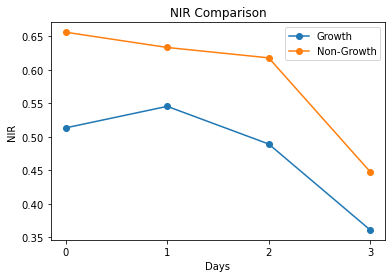

In [325]:
days = list(range(0, end-start+1))

plt.plot(p1_mean, marker='o', label='Growth')
plt.plot(p2_mean, marker='o', label='Non-Growth')
plt.xticks(days)
plt.xlabel('Days')
plt.ylabel('NIR')
plt.title('NIR Comparison')
plt.legend(loc='best') 
# plt.show()

plt.savefig(f'F:/RGB-NIR/{mode}/results/NIR/NIR_comparison.png')

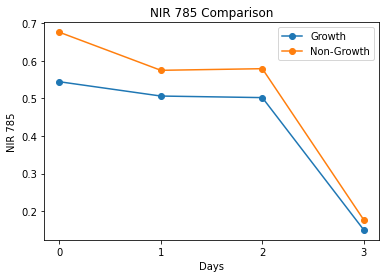

In [326]:
plt.plot(p1_mean2, marker='o', label='Growth')
plt.plot(p2_mean2, marker='o', label='Non-Growth')
plt.xticks(days)
plt.xlabel('Days')
plt.ylabel('NIR 785')
plt.title('NIR 785 Comparison')
plt.legend(loc='best') 
#plt.show()

plt.savefig(f'F:/RGB-NIR/{mode}/results/NIR/NIR_785_comparison.png')

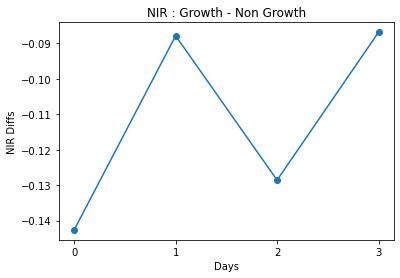

In [285]:
plt.plot(leaf_mean, marker='o')
plt.xticks(days)
plt.title('NIR : Growth - Non Growth')
plt.xlabel('Days')
plt.ylabel('NIR Diffs')
# plt.show()

plt.savefig(f'F:/RGB-NIR/{mode}/results/NIR/NIR_Diff.png')

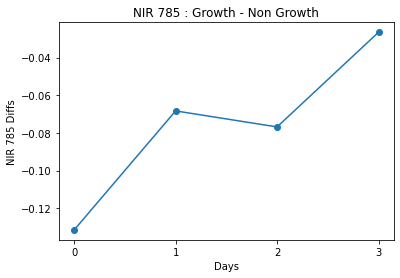

In [286]:
plt.plot(leaf_mean2, marker='o')
plt.xticks(days)
plt.title('NIR 785 : Growth - Non Growth')
plt.xlabel('Days')
plt.ylabel('NIR 785 Diffs')
# plt.show()

plt.savefig(f'F:/RGB-NIR/{mode}/results/NIR/NIR_785_Diff.png')

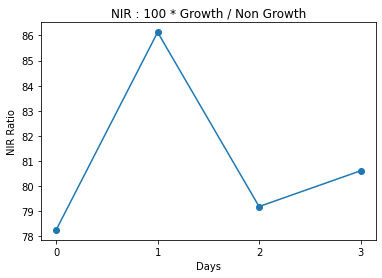

In [287]:
plt.plot(leaf_ratio, marker='o')
plt.xticks(days)
plt.title('NIR : 100 * Growth / Non Growth')
plt.xlabel('Days')
plt.ylabel('NIR Ratio')
# plt.show()

plt.savefig(f'F:/RGB-NIR/{mode}/results/NIR/NIR_Ratio.png')

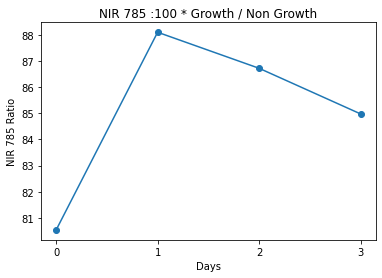

In [288]:
plt.plot(leaf_ratio2, marker='o')
plt.xticks(days)
plt.title('NIR 785 :100 * Growth / Non Growth')
plt.xlabel('Days')
plt.ylabel('NIR 785 Ratio')
#plt.show()

plt.savefig(f'F:/RGB-NIR/{mode}/results/NIR/NIR_785_Ratio.png')